# Exercises on Unsupervised Learning with Scikit-Learn

## 1. Introduction

Unsupervised machine learning is when the user steps back and trusts the computer's intuition in finding patterns and correlations within the data. We have discussed different methods for classical unsupervised learning (pre-deep learning) and will utilise these on an artificial dataset to see how they work and where they fall short. To do this we will be using various modules from the ```scikit-learn``` python package.

The first thing we need to do is import the relevant packages we will be using. We need ```numpy``` for loading the data and manipulating arrays and we use ```matplotlib``` as our plotting tool.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Next we must load the dataset. The data is saved in ```.npz``` format. This is a data format native to ```numpy``` and works to save multiple ```numpy``` arrays to disk without losing any information. For more information check out the [`scipy` documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.lib.format.html#module-numpy.lib.format). ```.npz``` is essentially a ```.zip``` of ```numpy``` arrays. Loading a ```.npz``` file returns a ```dict```-like object where the arrays have the keys corresponding to the names assigned when saving the file. e.g.

```python
>>> import numpy as np
>>> a = np.array([[1,2],[3,4]])
>>> np.savez_compressed("a.npz",data=a)
>>> f = np.load("a.npz")
>>> f["data"] == a
array([[True, True],
       [True, True]])
```

In the example above, we use the function ```savez_compressed``` to save the data which creates a compressed ```.npz``` file but the function ```savez``` to create an uncompressed ```.npz``` file also exists (but when loading the data will make your code slower. ```.npz``` files preserve the structure of the arrays so there is no need to worry about doing any data manipulations when working with these files.

Edit the template below to load the data we will use for the exercises.

In [3]:
data = np.load("data.npz")["data"] #I have saved the data array to the key "data" in our .npz file

## 2. Exercise 1: Dimensionality Reduction of the Data

Explore the data you have just loaded in:

* What is the shape of the data?
* What does this tell you about the number of features that describe the data?
* What does the data look like projected onto 2D (try mixtures of the feature dimensions)?
* How many different types of data are there?
* How might you go about embedding this data on a lower dimensional space while still maintaining most of the information?

We will use classical PCA (Principal Component Analysis) to reduce the dimensions of our data (as not all of our features are important to learn about the variability in the data).

In [4]:
from sklearn.decomposition import PCA #import the PCA class from scikit-learn

PCA (as discussed in the lecture) is a dimensionality reduction technique which finds the *natural* basis for the data and finds the affine transformation required to translate to this basis in which each principal component has maximum variance. Each principal component can be thought of as a linear combination of the features defining the data. In our example, our data is described by 10 features with 400 samples.

Firstly, we want to work out the 10 principal components and which are relevant in describing our data. This can be done using the PCA class we have just imported. After performing a PCA analysis on the data, have a look at the `explained_variance_ratio_` attribute of the PCA class to see what components are important.

The documentation for PCA can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [5]:
#use this space here to write your code for doing the simple PCA analysis
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

A plot can also be made of the important principal components which show the importance of each. For this we should use the `plt.bar` from `matplotlib`.

<IPython.core.display.Javascript object>


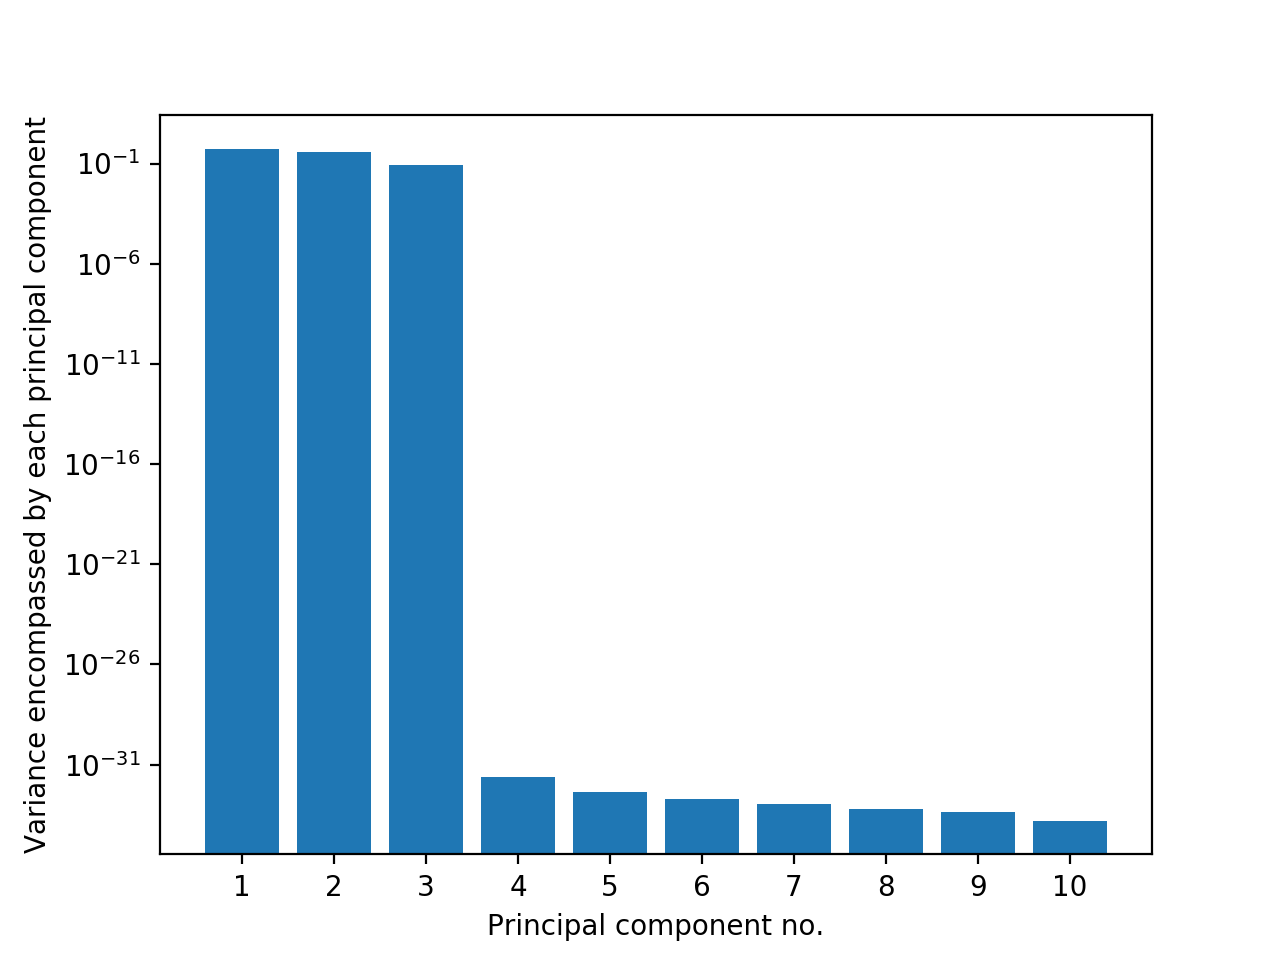

In [6]:
#skeleton script for bar chart of the principal components
plt.figure()
plt.bar(np.arange(10),pca.explained_variance_ratio_,tick_label=np.arange(10)+1)
plt.yscale("log")
plt.ylabel("Variance encompassed by each principal component")
plt.xlabel("Principal component no.");

Hint: you may want to plot the most important principal components on a linear to see the relative importance between them.

<IPython.core.display.Javascript object>


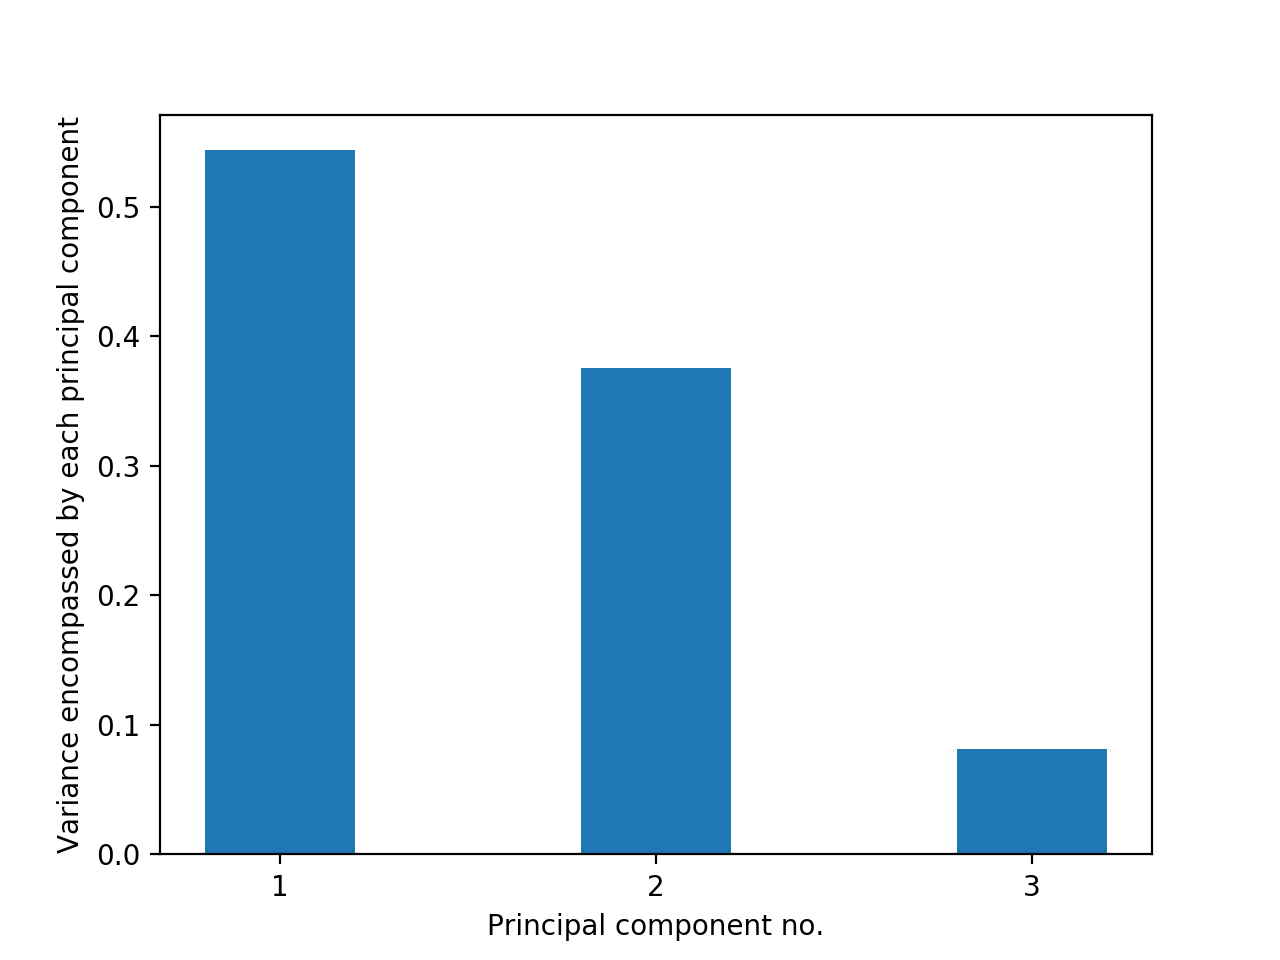

In [7]:
plt.figure()
plt.bar(np.arange(3),pca.explained_variance_ratio_[:3],tick_label=np.arange(3)+1,width=0.4)
plt.ylabel("Variance encompassed by each principal component")
plt.xlabel("Principal component no.");

A good rule of thumb is that any sum of principal components that corresponds to more than 95% of the variance in the system are good enough to describe your system of data. That is, we discard the dimensions that make up very little of the variation in our data. We can then use the PCA class to reduce the size of the dataset to be described by the samples expressed in the basis of the most important principal components (the number of which will be set by you).

In [8]:
#use this space here to write your code for reducing the dimensions of the code
pca.n_components=3
data_reduced = pca.fit_transform(data)

After successfully reducing the dimensions in your data, try plotting the permutations of the principal components to see which gives you the best view of the data.

<IPython.core.display.Javascript object>


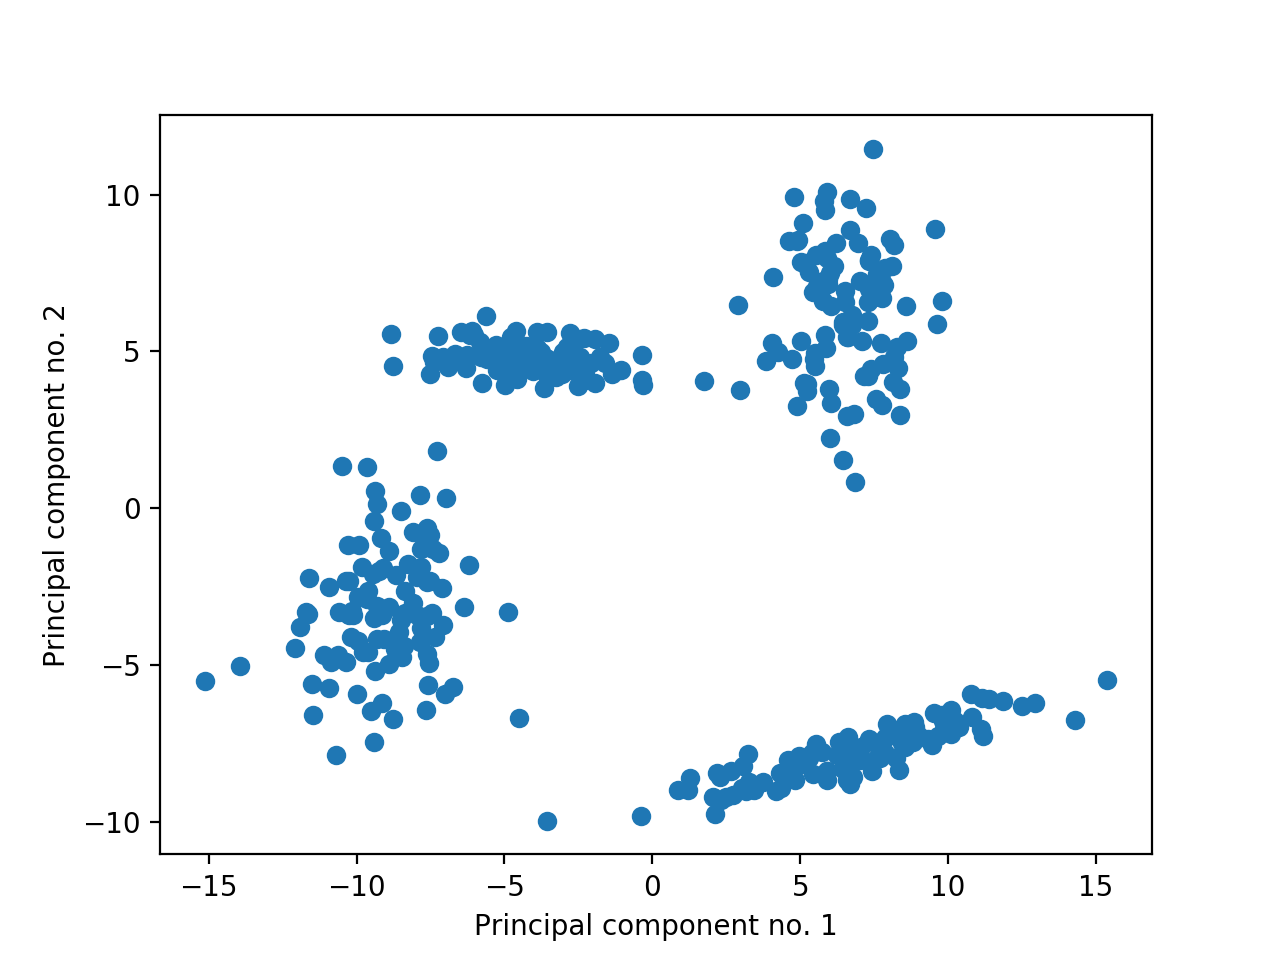

<IPython.core.display.Javascript object>


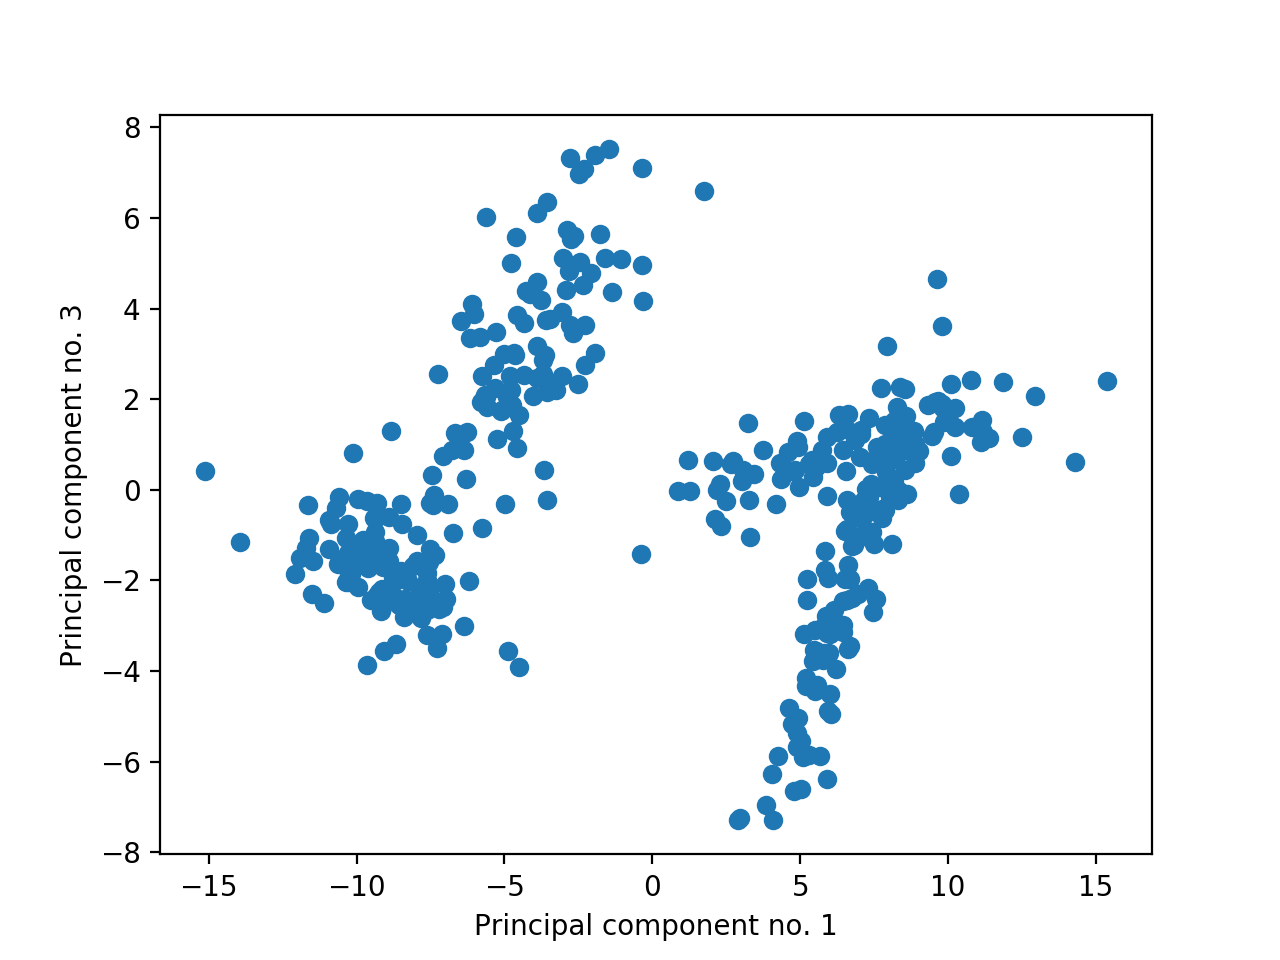

<IPython.core.display.Javascript object>


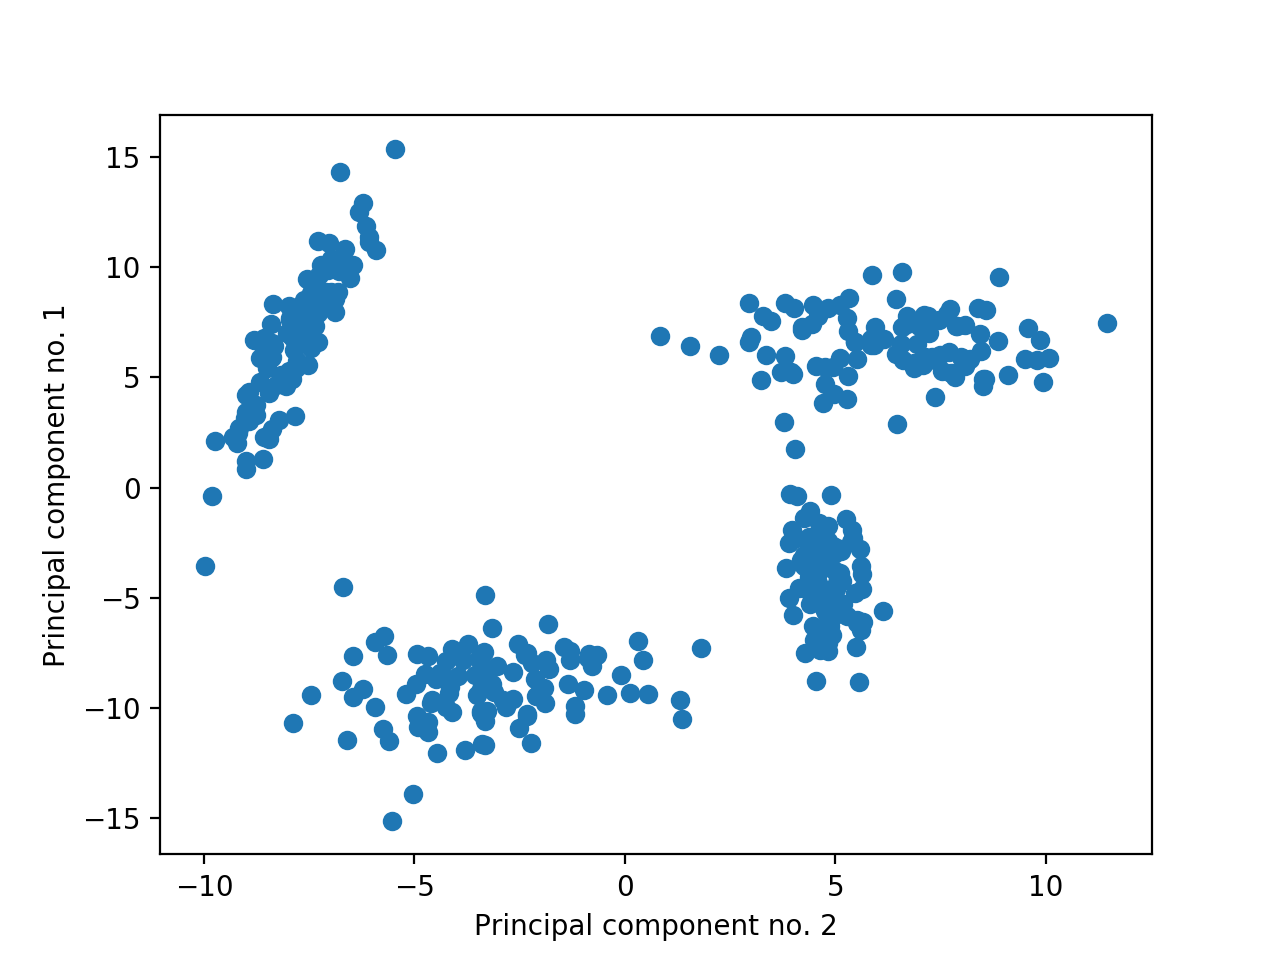

<IPython.core.display.Javascript object>


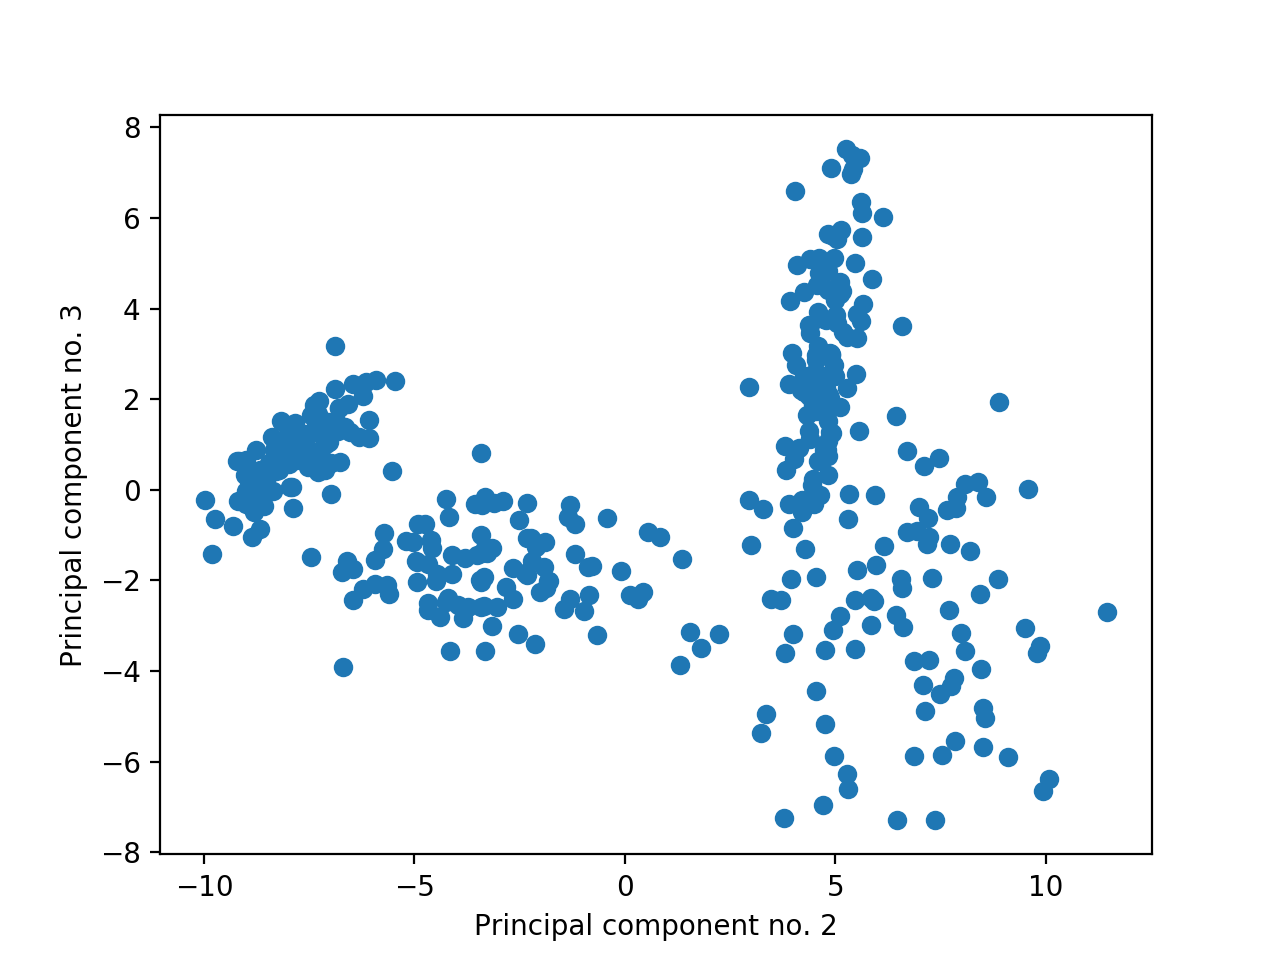

<IPython.core.display.Javascript object>


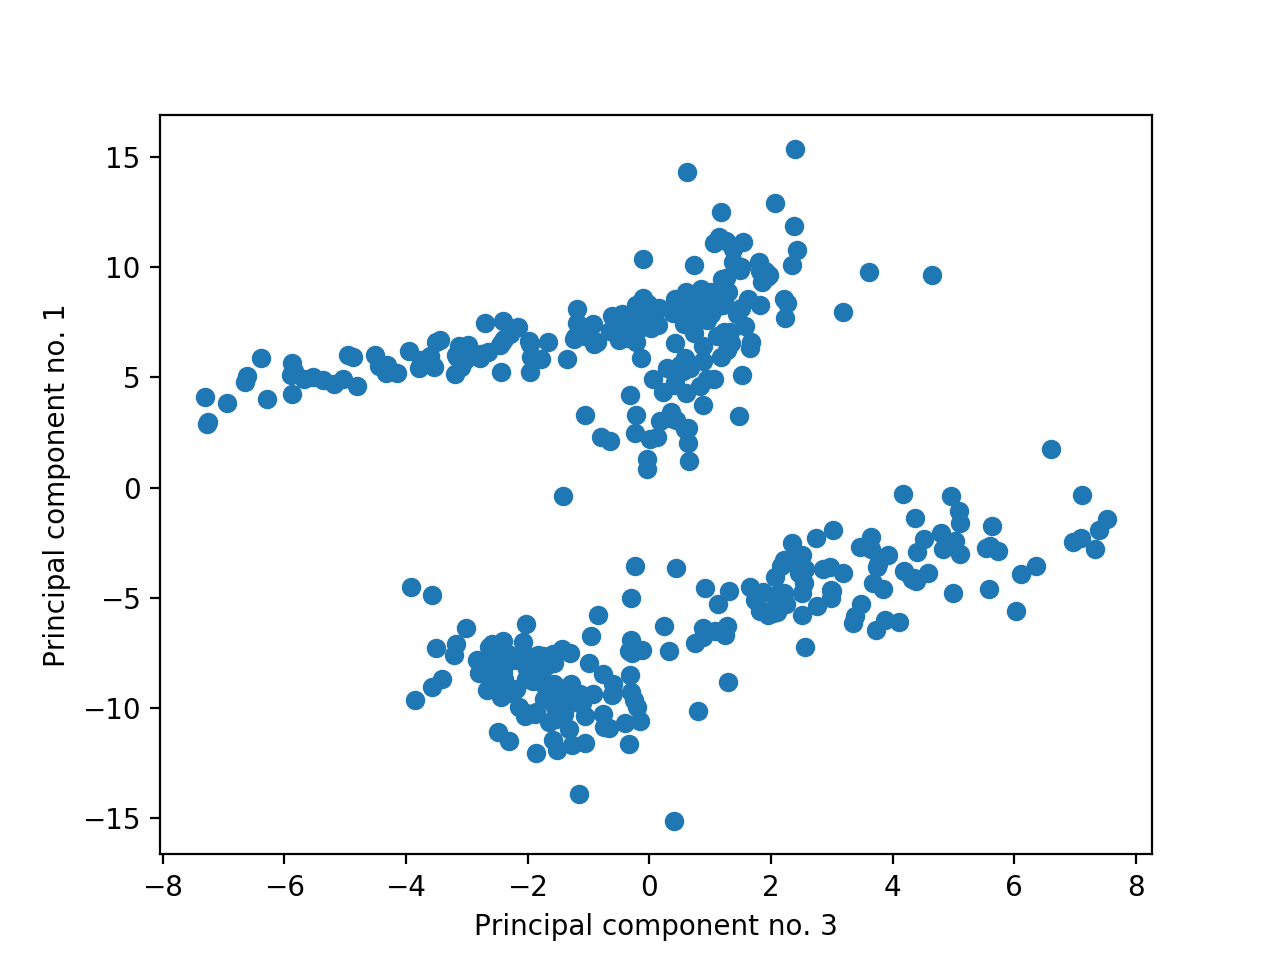

<IPython.core.display.Javascript object>


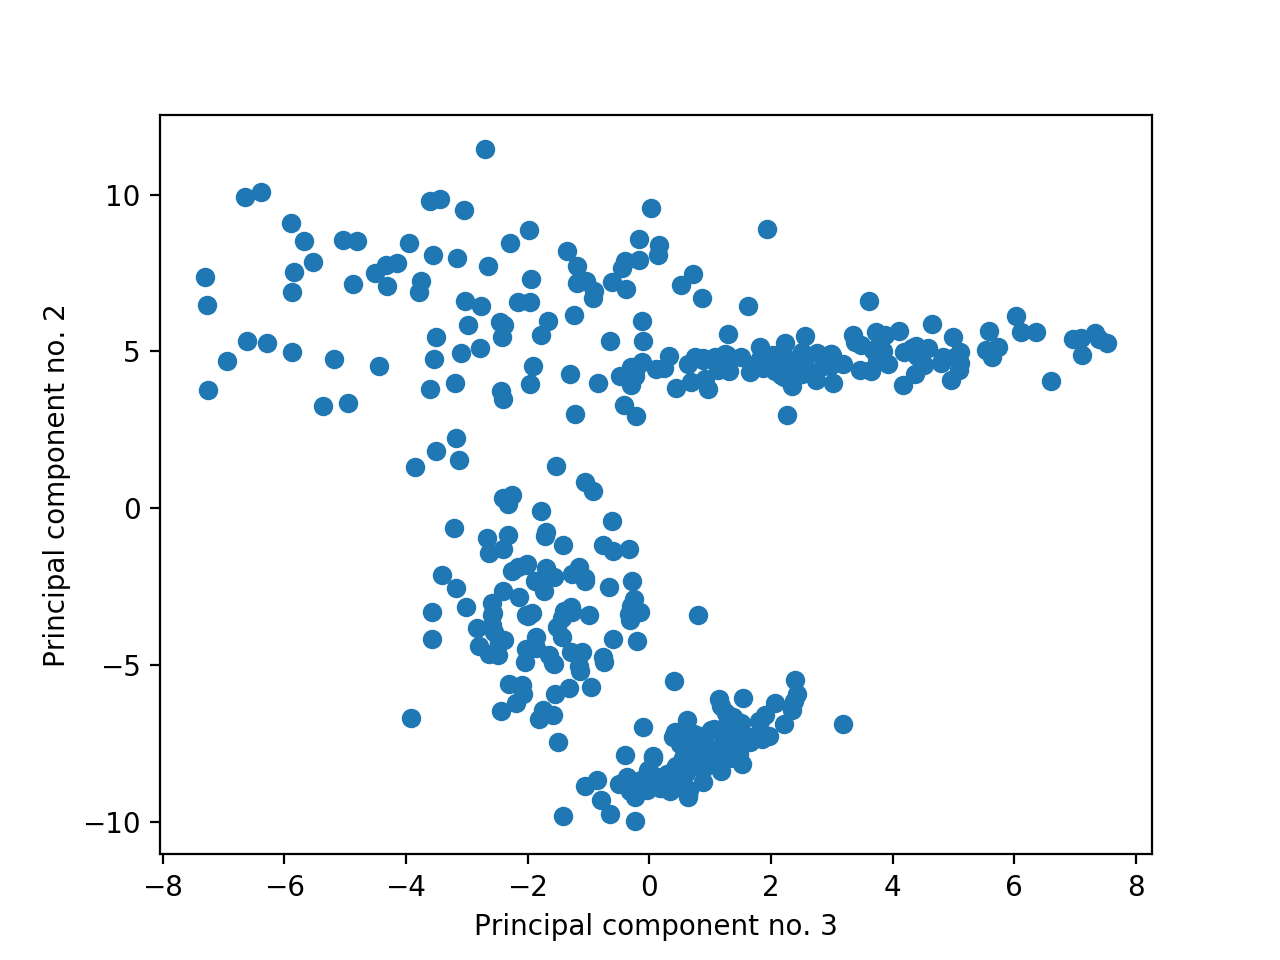

In [9]:
from itertools import permutations
perms = list(permutations(np.arange(3)+1,2)) #generates a list of all the two number permutations of the numbers 0,1,2
for i, (x,y) in enumerate(perms):
    plt.figure(i+1)
    plt.scatter(data_reduced[:,x-1],data_reduced[:,y-1])
    plt.xlabel("Principal component no. %s" % x)
    plt.ylabel("Principal component no. %s" % y)

### Questions to be answered:

1. What is the best permuted visualisation of the data in terms of the principal components that encompass the most variance?
2. Do 2D projections of the original data make it obvious where the principal components lie?
3. What led you to the choices you made for the most important principal components of the data?

## 3. Exercise 2: Hierarchical Clustering

Now that we can see what the data looks like when expressed in terms of its most important principal components, we can see the true separation of the classes. Our next job is to cluster this dataset using hierarchical clustering covered in the lecture. This should be very easy to see where the clusters lie.

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Here we use agglomerative clustering which is where we start with each data point being a cluster, and with our defined distance metric calculate the pairwise distance between each points. Following this, we take the two closest clusters via our linkage method and merge them to become a new cluster. This algorithm concludes when all data points are part of one large cluster.

Note: *divisive* clustering also exists. This is where we start with all data points being in one cluster and do the reverse. However, this has problems when splitting the data into smaller clusters as it is difficult to define the right heuristic to use to separate these clusters. As a result, agglomerative clustering is the preferred method.

Try different linkage methods, affinities and cluster numbers and see how changing these hyperparameters changes the clustering results. It should be obvious from the previous plot what the number of clusters should be but this may not always be obvious with your data so it's nice to see how the algorithm works with more or less clusters than is actually needed. Documentation for agglomerative clustering can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [11]:
from itertools import product
links = ["single","average","complete"]
metric = ["euclidean","minkowski","cityblock","chebyshev"]

In [12]:
#use this space to set up your clustering algorithm
prods = list(product(links,metric))
prods.append(("ward", "euclidean"))
clustering = []
for i, (x,y) in enumerate(prods):
    Z = linkage(data_reduced,method=x,metric=y)
    clustering.append(Z)

[Dendrograms](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) are a good way to visualise the connections made by your clustering algorithm. Perform clustering several times using different combinations of linkages and metrics to see which gives you the best answer. The best answer can be seen in the dendrogram i.e. make plots of each dendrogram and see which gives you the desired result!

<IPython.core.display.Javascript object>


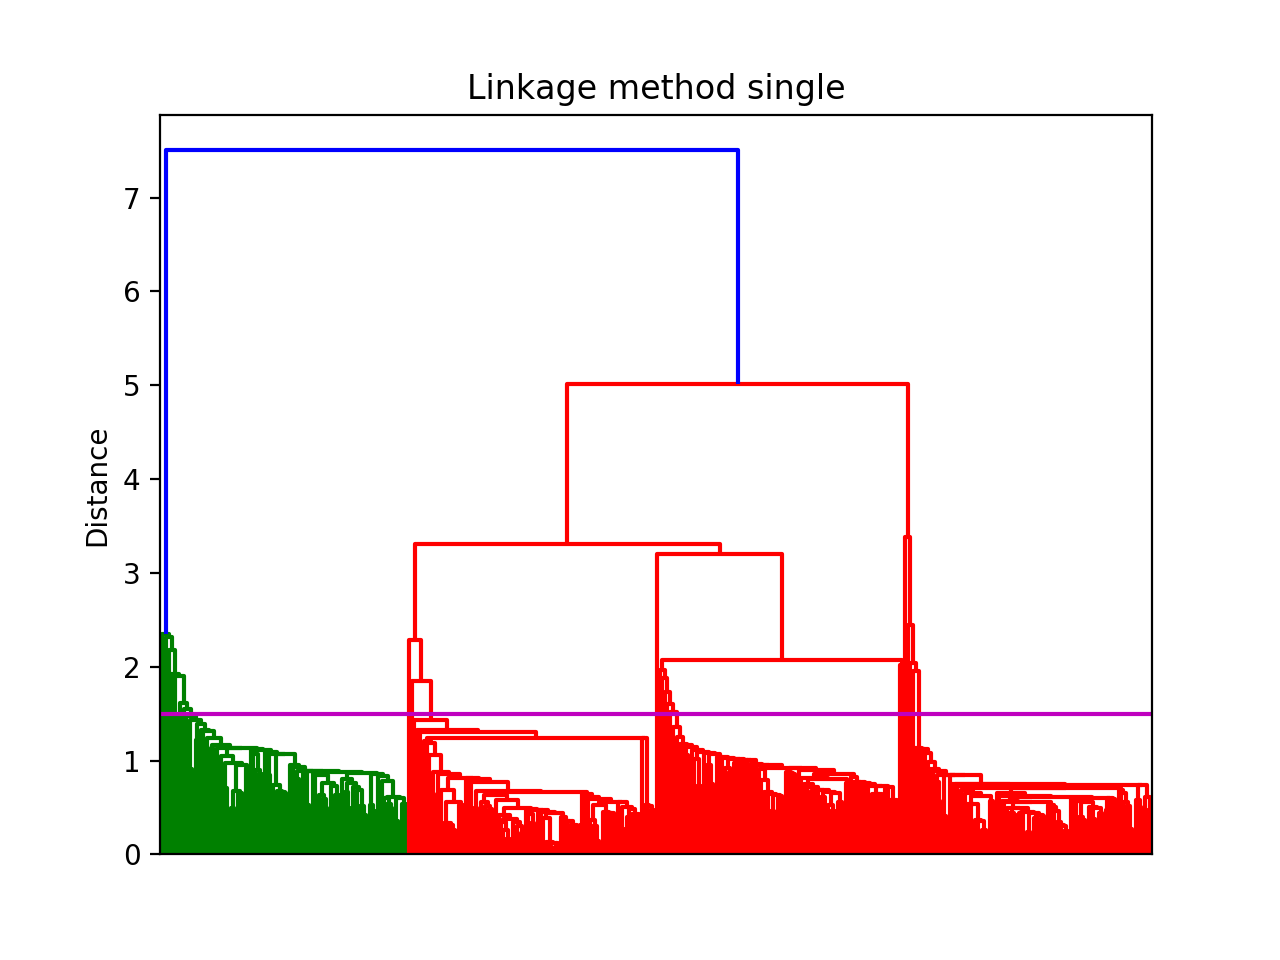

<IPython.core.display.Javascript object>


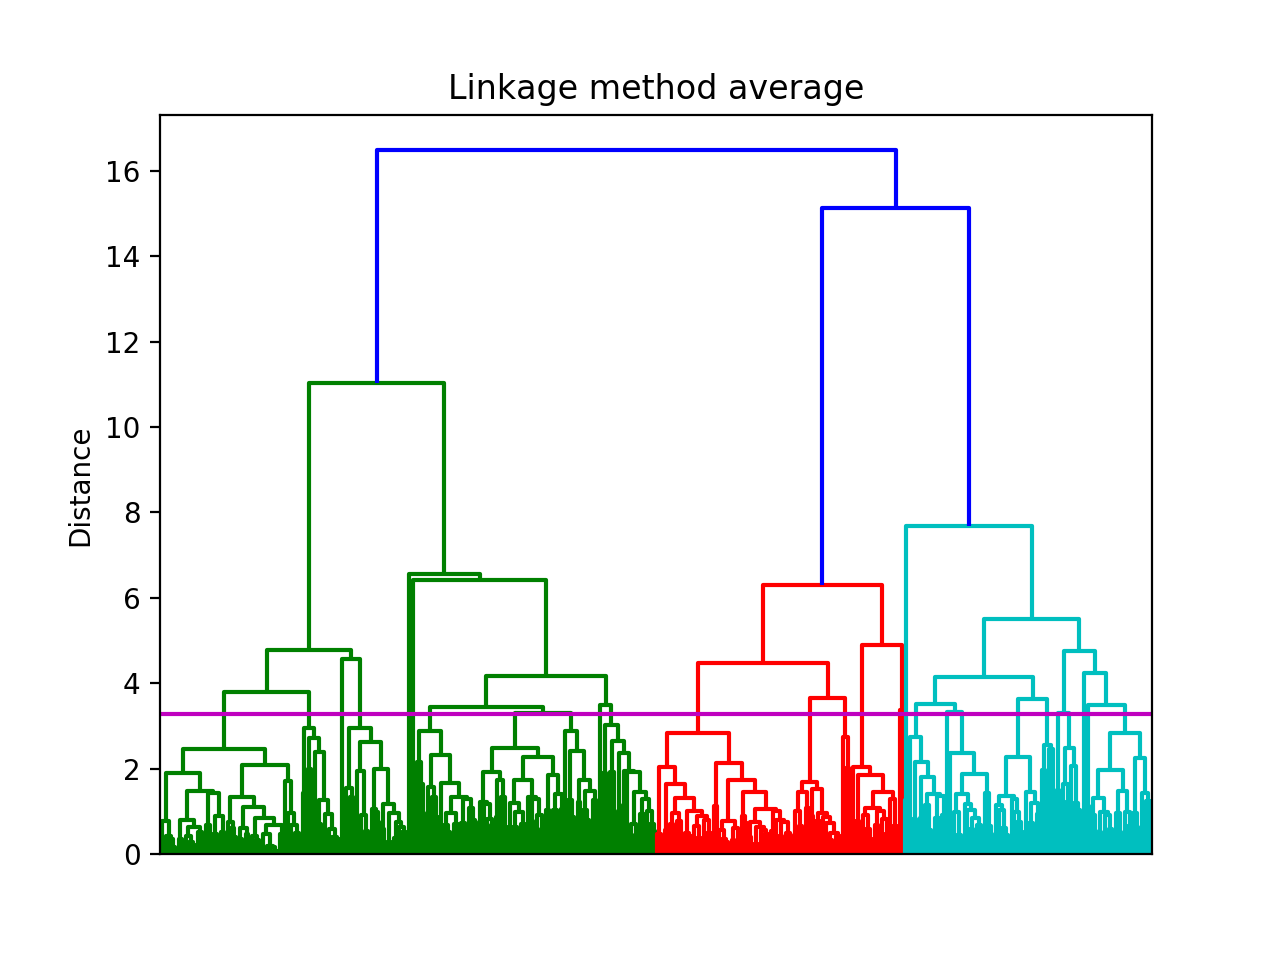

<IPython.core.display.Javascript object>


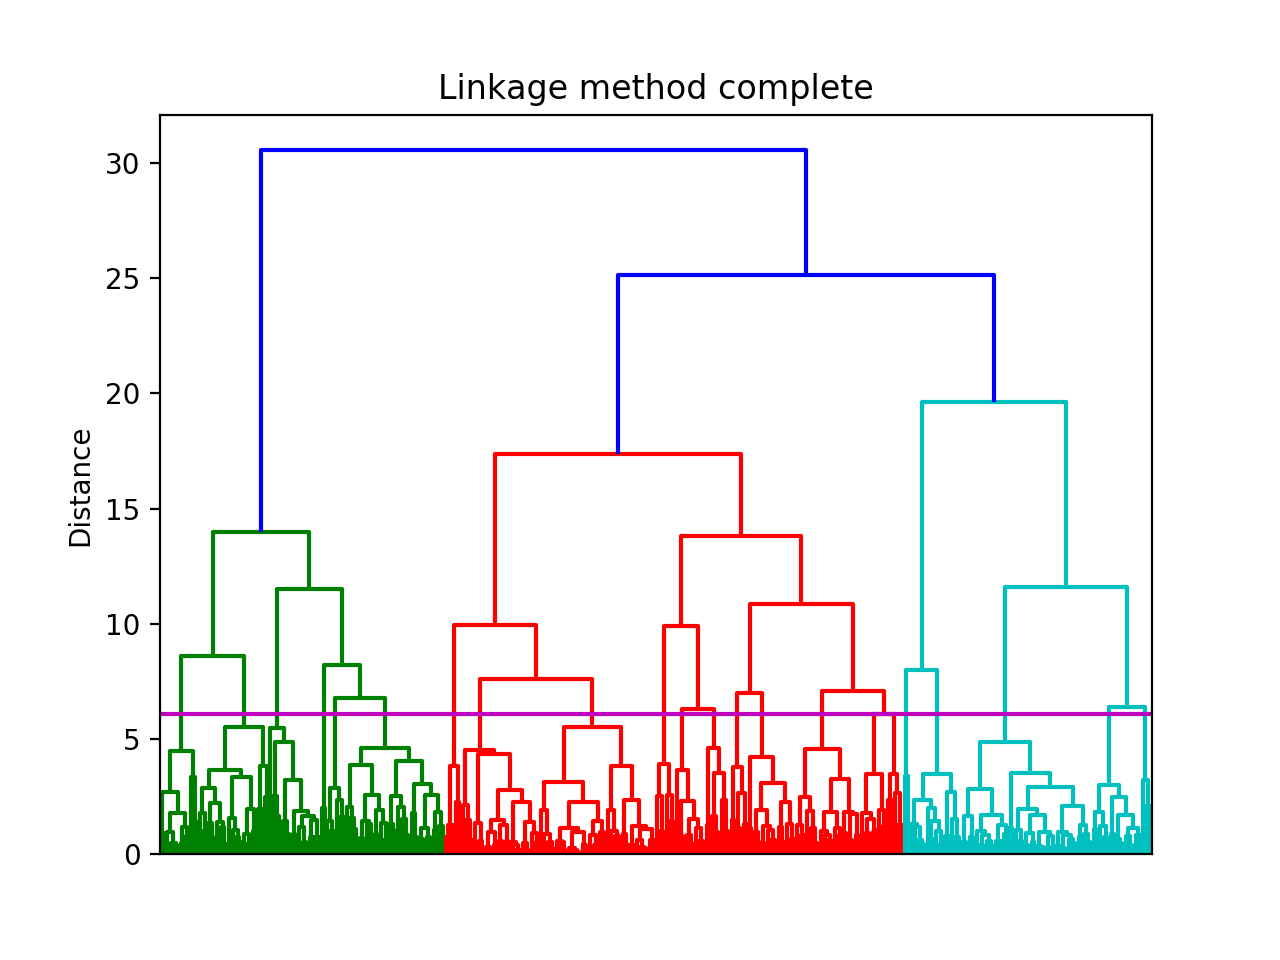

<IPython.core.display.Javascript object>


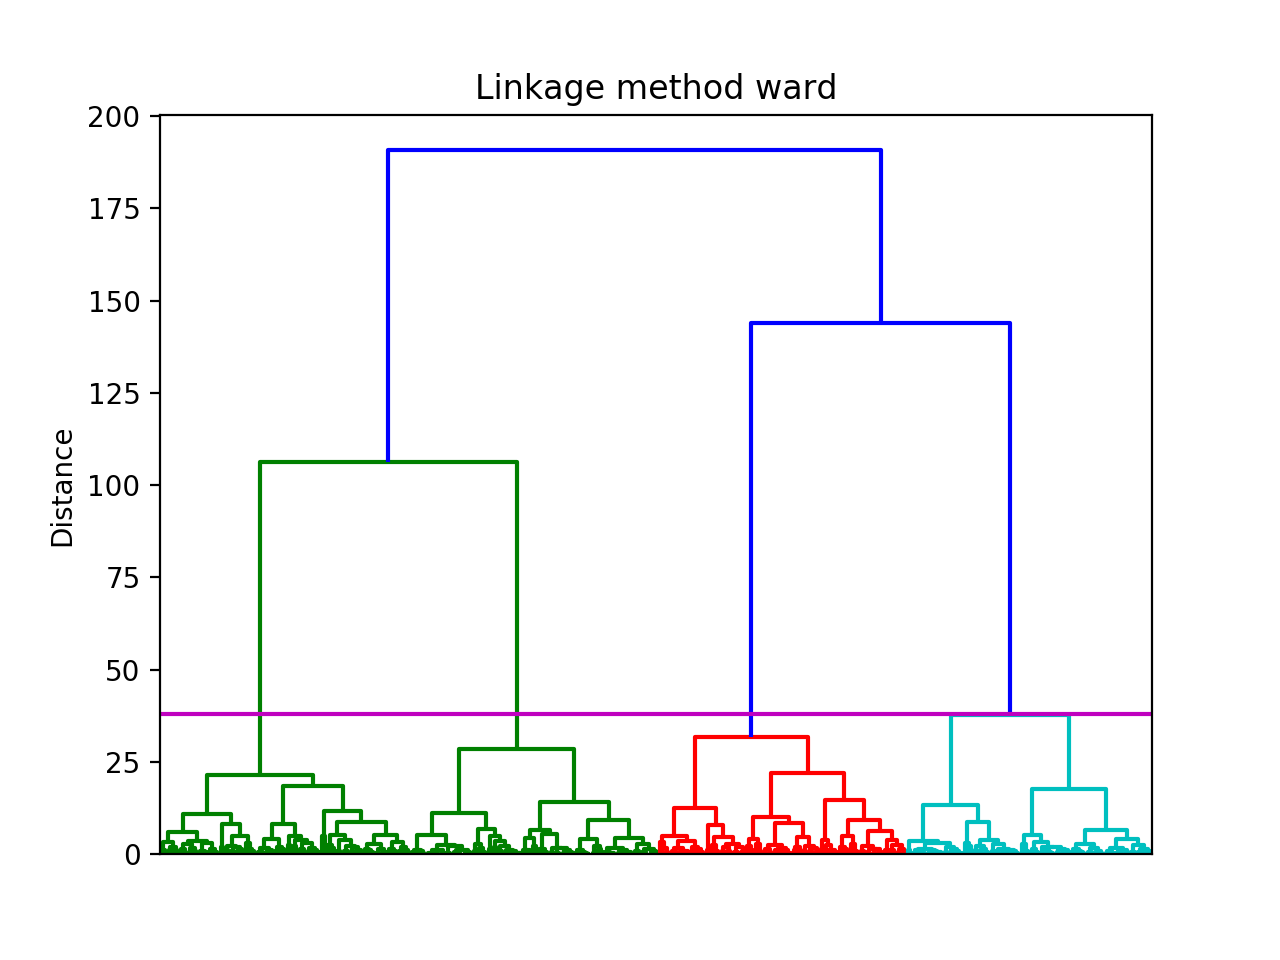

In [13]:
#use this space to plot the dendrograms
for i, j in enumerate(clustering):
    if prods[i][1] == "euclidean":
        plt.figure(i+1)
        dendrogram(j,no_labels=True)
        max_d = 0.2 *j[-1,2]
        plt.hlines(max_d,0,5000,colors="m")
        plt.title("Linkage method %s" % prods[i][0])
        plt.ylabel("Distance")

Once you have used the dendrogram to identify the number of clusters in the data, use the [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html?highlight=s) function to define your clusters and plot them with a different colour representing each label. Try this for each of the combinations of linkages and metrics you done previously as this will show more clearly the correct combination to choose.

<IPython.core.display.Javascript object>


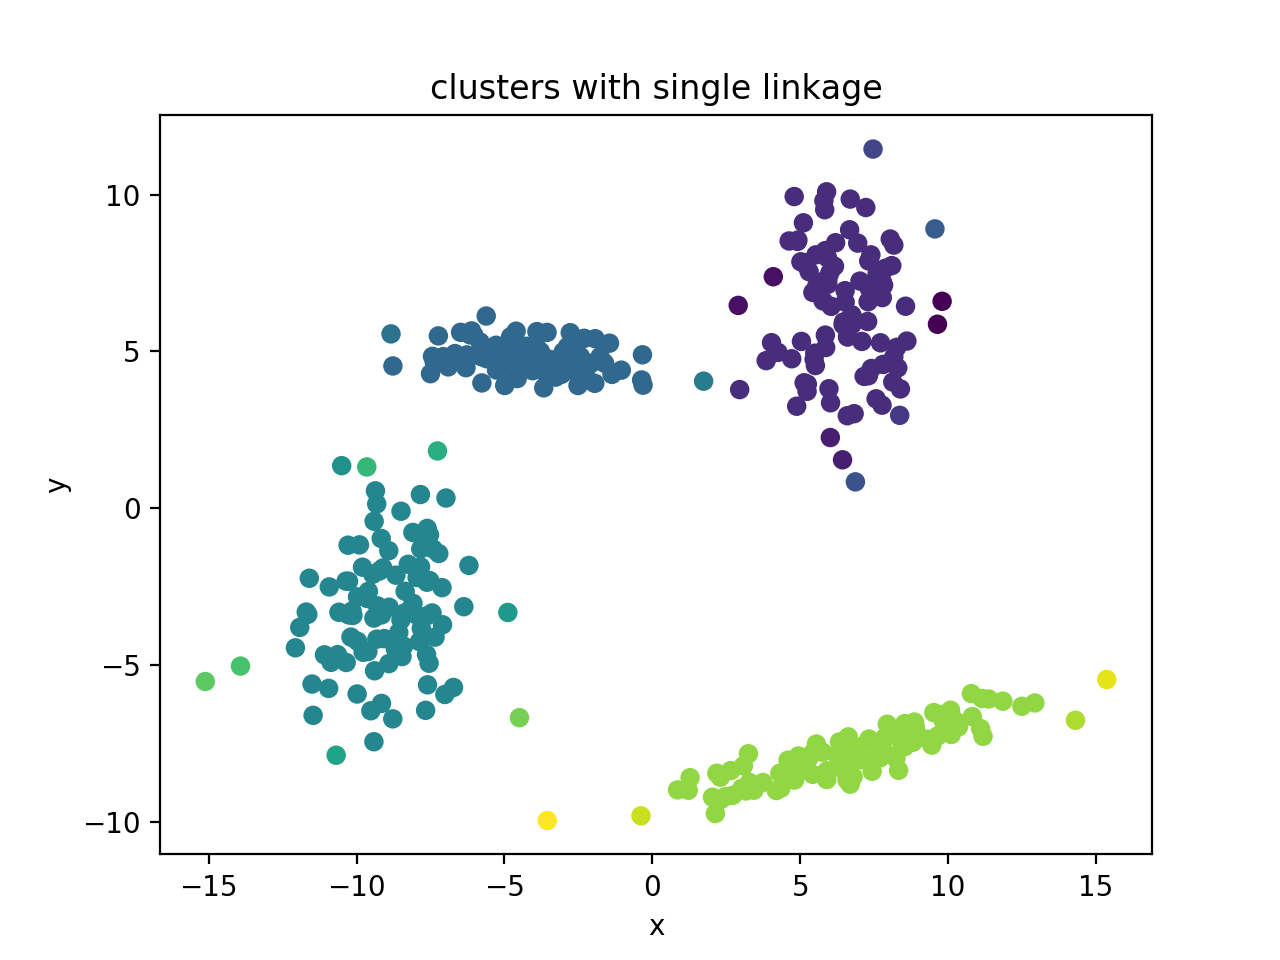

<IPython.core.display.Javascript object>


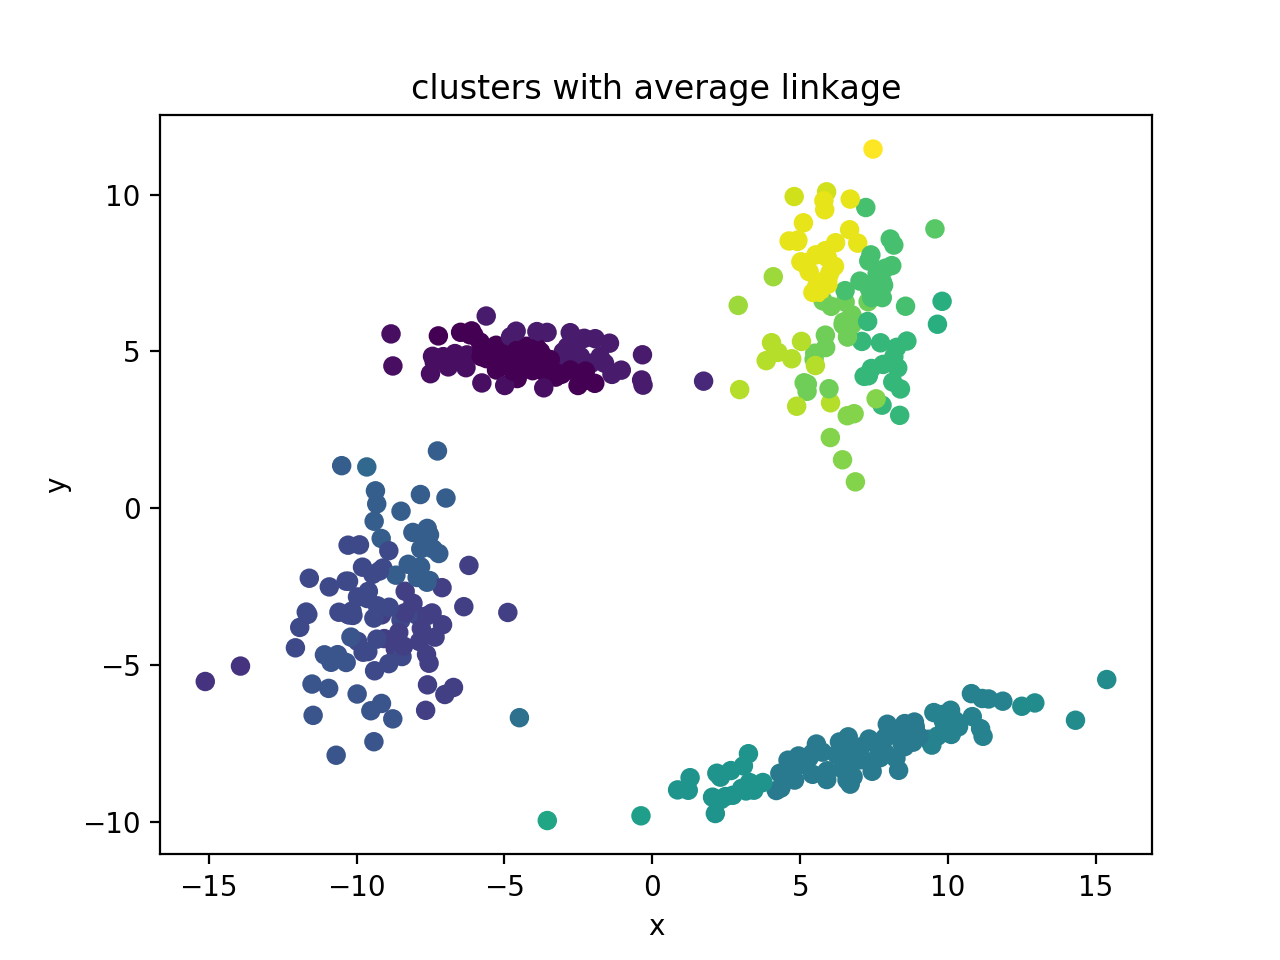

<IPython.core.display.Javascript object>


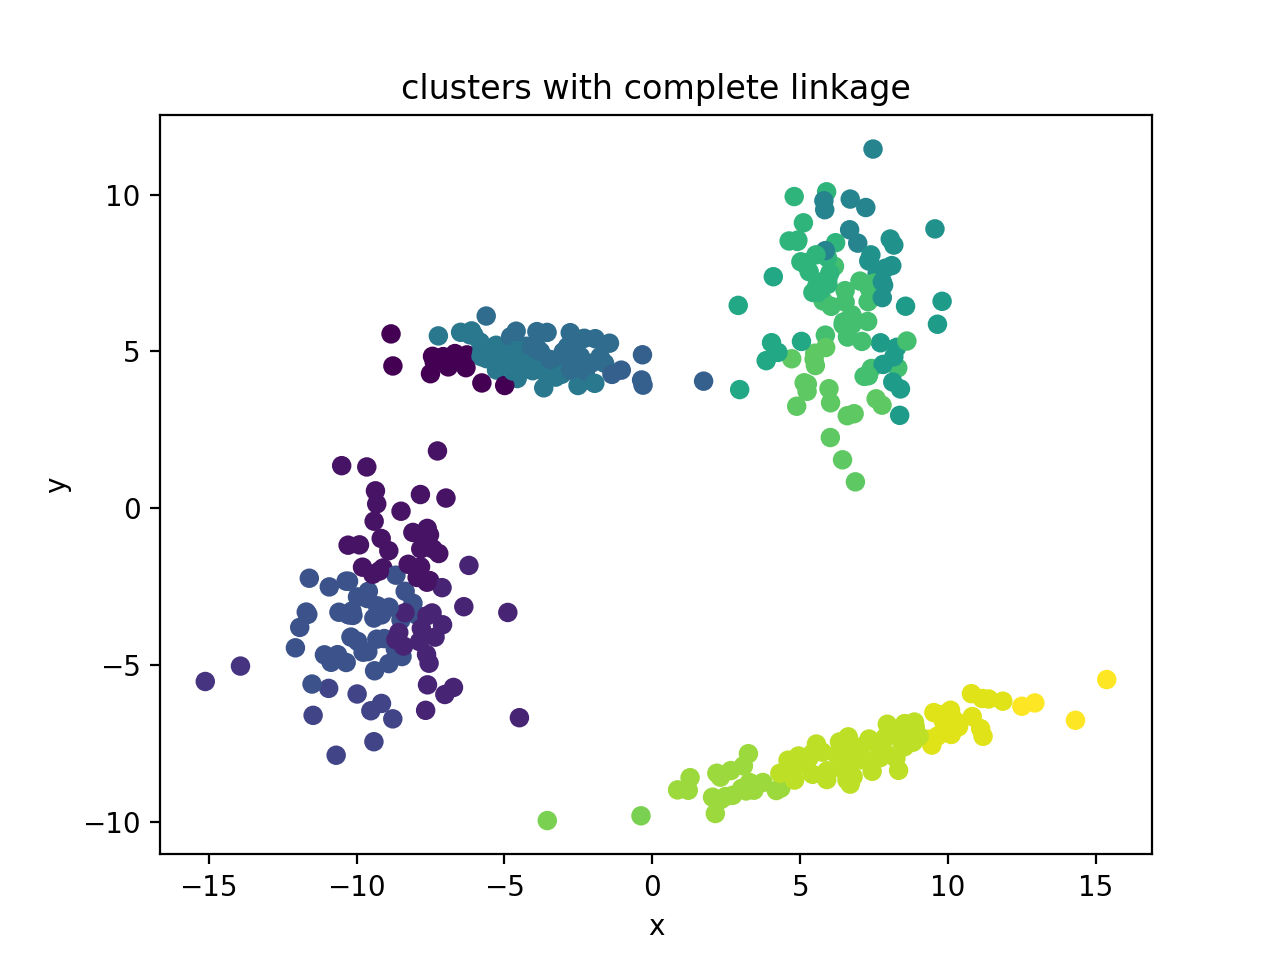

<IPython.core.display.Javascript object>


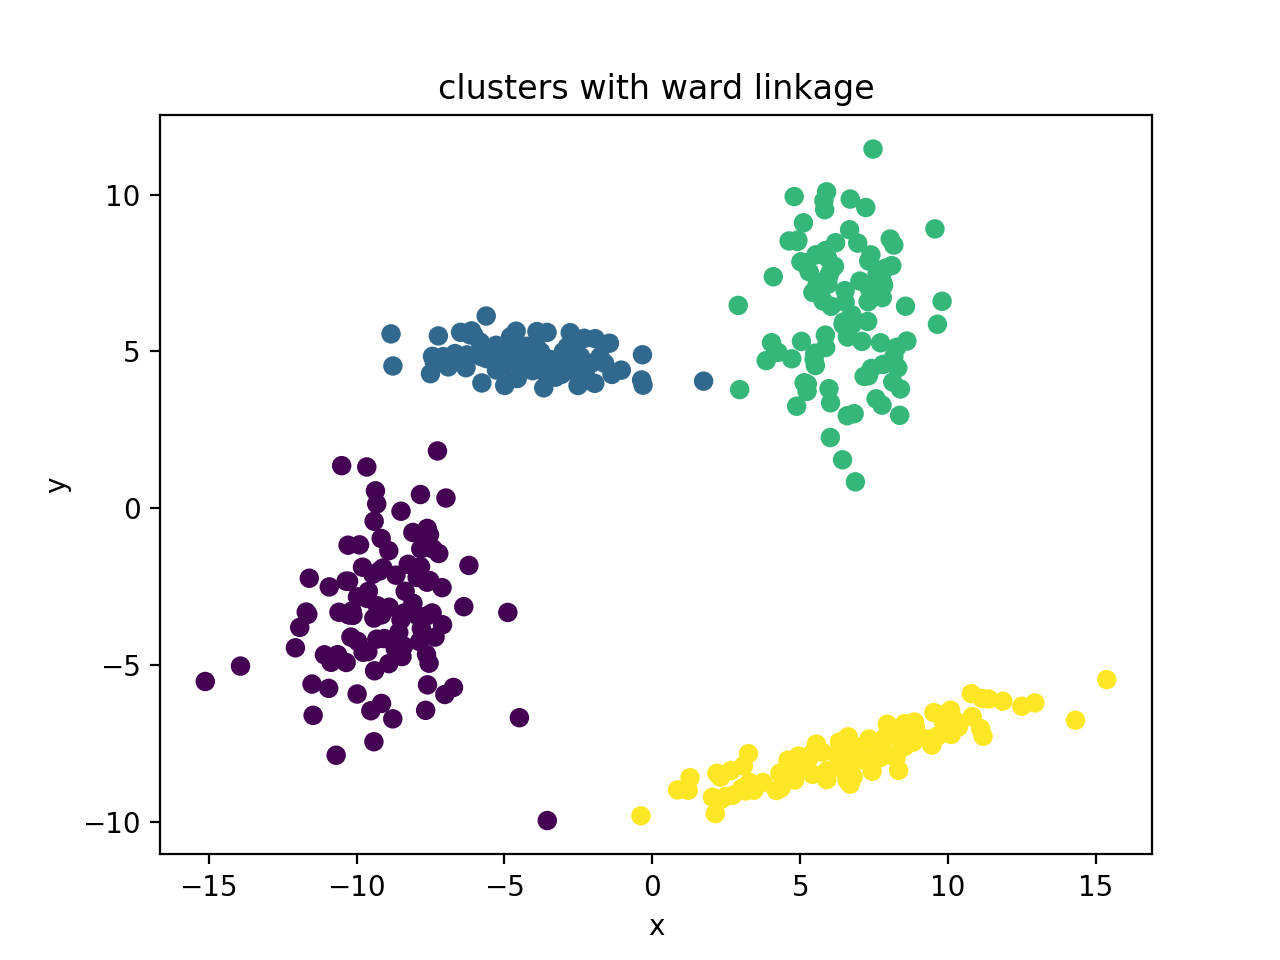

In [14]:
#use this space to create clusters and plot them two dimensionally
for i, j in enumerate(clustering):
    max_distance = j[-1, 2]
    
    max_d = max_distance * 0.2
    if prods[i][1] == "euclidean":
        clusters = fcluster(j, max_d, criterion='distance')
        plt.figure(i+1)
        plt.title("clusters with %s linkage" % prods[i][0])
        plt.scatter(data_reduced[:,0], data_reduced[:,1], c=clusters)
        plt.xlabel("x")
        plt.ylabel("y")

### Questions to be answered:

1. How do you use a dendrogram to determine the number of clusters of in a dataset?
2. How can you use a dendrogram to determine the right linkage method/metric to be used for hierarchical clustering?

## 4. Exercise 3: Clustering with PCA

There are many different clustering techniques with agglomerative being the most simple, easy to use and effective (in my opinion). However, there are ways to identify clusters in the data without using a clustering algorithm. This is what the following example is for.

After performing PCA on our original data, we can take the two most important principal components and plot the data. From here we cans see the clusters in the data clearly, however what if we only wanted to express our data in terms of one of the two of these principal compoenents. Would we still be able to see the clusters?

To do this, we plot [histograms](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) of the data projected onto 1D which shows how the data is spread out over these principal components.

<IPython.core.display.Javascript object>


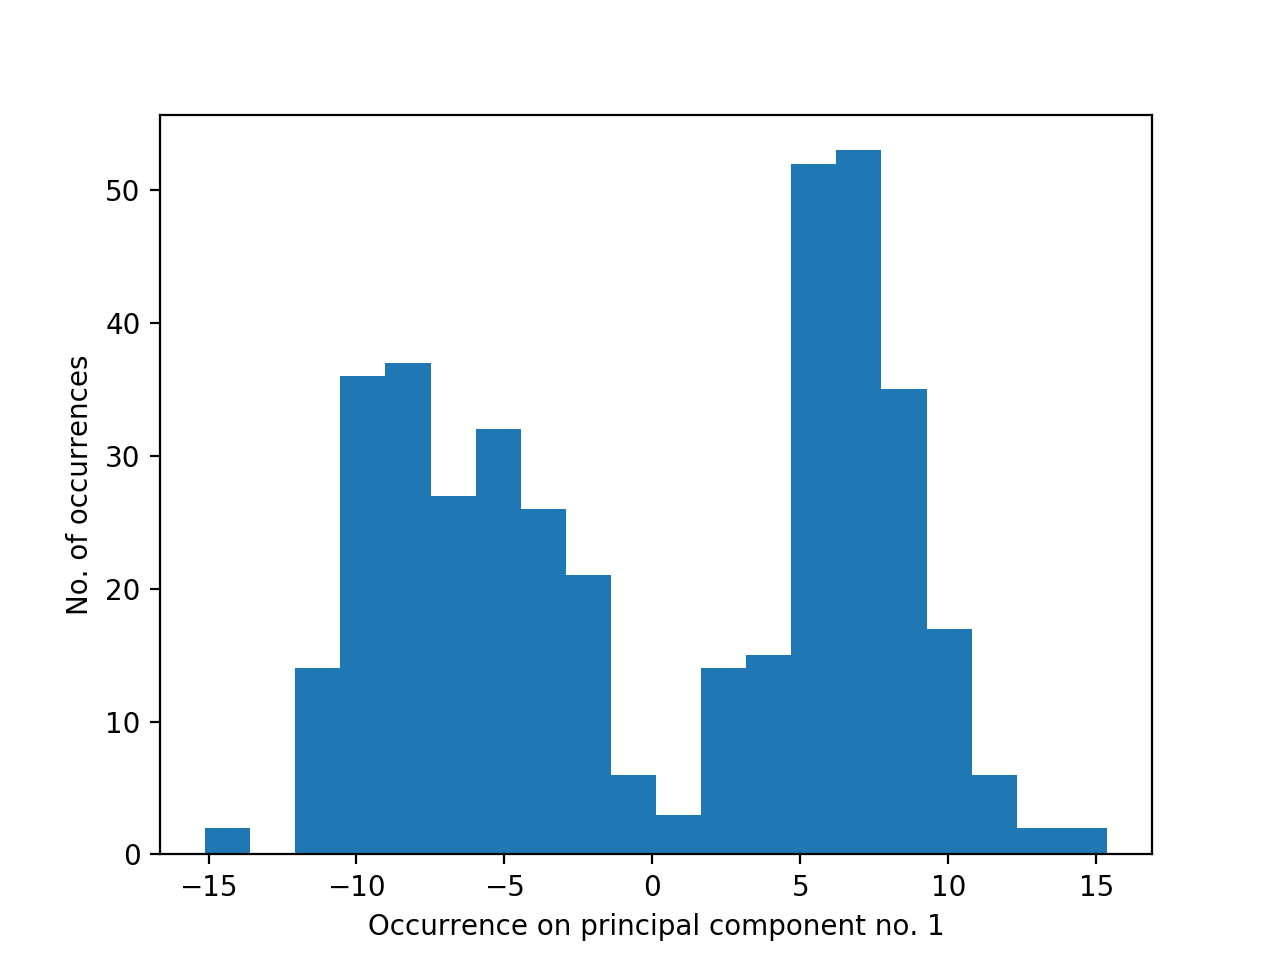

<IPython.core.display.Javascript object>


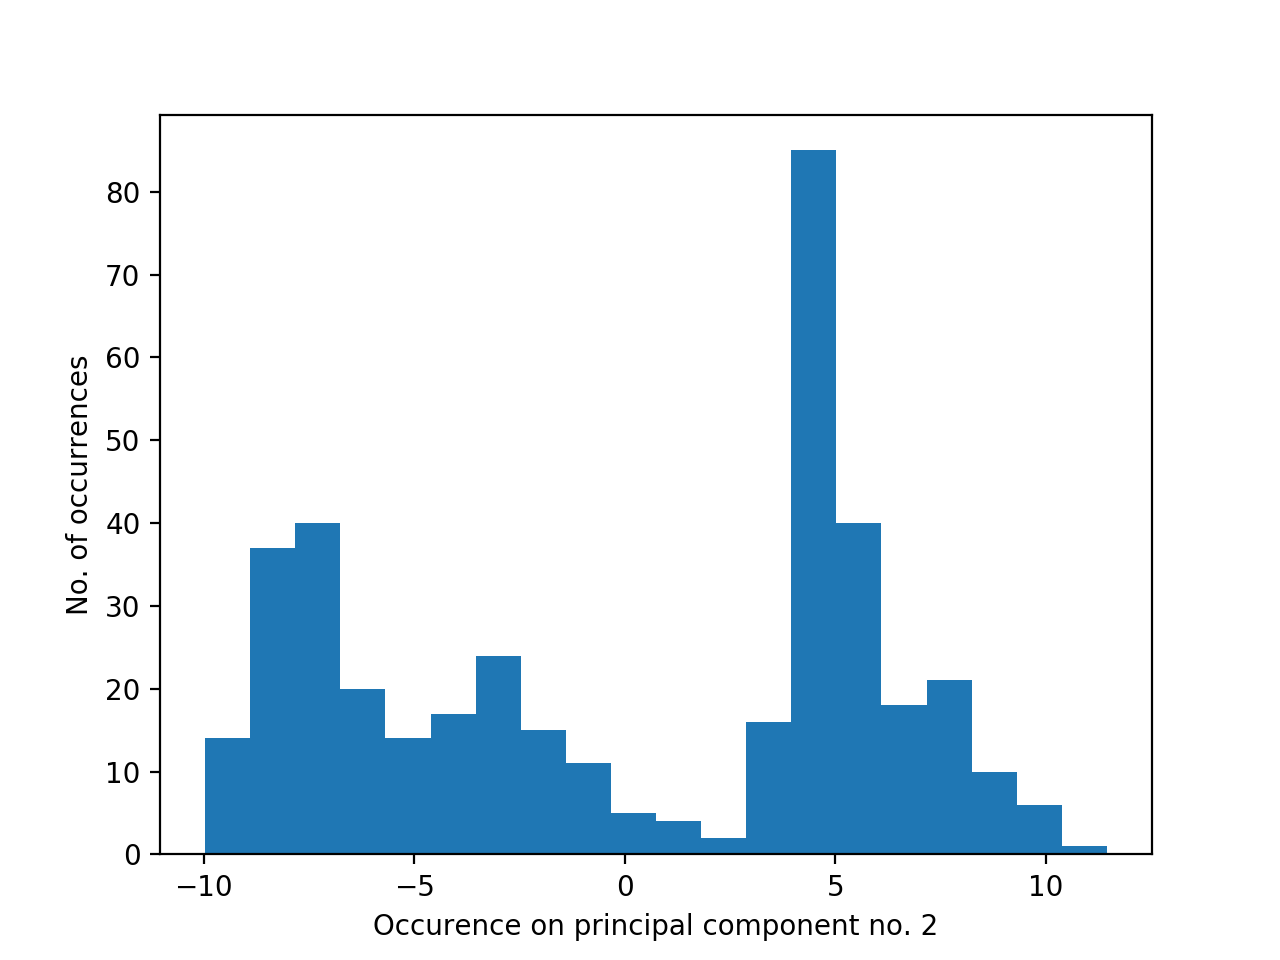

In [15]:
#perform PCA similarly to in Exercise 1 but this time choose only 2 principal components, then plot the projections of the data onto these singular principal components, use this space to plot the histograms
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)
plt.figure(1)
plt.hist(data_reduced[:,0],bins=20)
plt.ylabel("No. of occurrences")
plt.xlabel("Occurrence on principal component no. 1")
plt.figure(2)
plt.hist(data_reduced[:,1],bins=20)
plt.ylabel("No. of occurrences")
plt.xlabel("Occurence on principal component no. 2");

### Questions to be answered:

1. How many clusters do you see when projecting the data onto one principal component?
2. Is PCA a suitable algorithm for clustering in the case of this data or should we use a different method?
3. Can you think of a dataset where this kind of clustering would work?